# Images are just Arrays!

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from random import random

## Vectorize

In [24]:
class ChessBoard:
    def make_black(self,channel):
        channel[0] = 0
        channel[1] = 0 
        channel[2] = 0 
        channel[3] = 1 

    def make_white(self, channel):
        channel[0] = 1
        channel[1] = 1 
        channel[2] = 1 
        channel[3] = 1 

    def make_blue(self, channel):
        channel[0] = 0
        channel[1] = 0 
        channel[2] = 1 
        channel[3] = 1 

    def make_red(self, channel):
        channel[0] = 1
        channel[1] = 0
        channel[2] = 0 
        channel[3] = 1

    def add_blue(self, coords):
        self.make_blue(self.board[coords[0]][coords[1]])
        self.blue = coords
        
    def add_red(self, coords):
        self.make_red(self.board[coords[0]][coords[1]])
        self.red = coords

    def checker(self):
        row_count = 0
        column_count = 0
        for row in self.board:
            for column in self.board:
                for channel in column:
                    if (row_count % 2 == 0 and column_count % 2 == 0) or (row_count % 2 == 1 and column_count % 2 == 1):
                        self.make_black(channel)
                    else:
                        self.make_white(channel)
                    column_count += 1
                row_count += 1

    def  __init__(self):
        self.board = np.random.uniform(size=(8,8, 4))
        self.checker()
        self.red = None
        self.blue = None

    def render(self):
        plt.imshow(self.board)

    def is_diagonal(self):
        """
        given coordinates for 2 points a and b
        determine if they are diagonals
        """
        dx = abs(self.red[0] - self.blue[0])
        dy = abs(self.red[1] - self.blue[1])
        return dx == dy

    def is_horizontal_or_vertical(self):
        if self.red[0] == self.blue[0] or self.red[1] == self.blue[1]:
            return True

    def is_under_attack(self):
        if self.is_diagonal():
            return True
        elif self.is_horizontal_or_vertical():
            return True
        else:
            return False


True


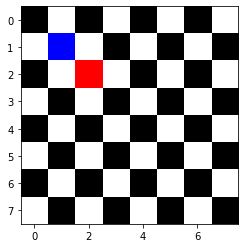

In [25]:
gameboard = ChessBoard()
gameboard.add_blue([1,1])
gameboard.add_red([2,2])
print(gameboard.is_under_attack())
gameboard.render()


## User Acceptance Tests
- queens on same row should be “under attack”
- queens on same column should be “under attack”
- queens on same diagonal should be “under attack”
- queens with any other coordinates should NOT be “under attack”

**NOTE: Include assert statements directly in your notebook verifying the behavior above.**

queens on same row should be “under attack”

In [26]:
test_gb1 = ChessBoard()
test_gb1.add_blue([2,2])
test_gb1.add_red([2,4])
assert test_gb1.is_under_attack() == True

queens on same column should be “under attack”

In [27]:
test_gb2 = ChessBoard()
test_gb2.add_blue([2,2])
test_gb2.add_red([4,2])
assert test_gb2.is_under_attack() == True

queens on same diagonal should be “under attack”

In [28]:
test_gb3 = ChessBoard()
test_gb3.add_blue([2,2])
test_gb3.add_red([3,3])
assert test_gb3.is_under_attack() == True

queens with any other coordinates should NOT be “under attack”

In [29]:
test_gb4 = ChessBoard()
test_gb4.add_blue([7,2])
test_gb4.add_red([3,3])
assert test_gb4.is_under_attack() == False